# Time Series Analysis: Unraveling Retail Sales

Time series analysis allows us to extract patterns and insights from sequential data, guiding us in forecasting future trends. Its applications span various domains, from stock markets to weather predictions, and of course, retail sales.

Objective: The aim is to comprehend the sales trends within the Superstore dataset, dissecting the data by product categories. I'll apply time series decomposition to pinpoint underlying patterns and utilize models like Prophet to forecast future sales. By comparing different methods, I aim to find a reliable forecasting model for this specific dataset.

The dataset's key columns include:
['Order Date', 'Ship Mode', 'Segment', 'Region', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit']

It's worth noting that while this analysis draws inspiration from a comprehensive Towards Data Science article (https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b), my approach carves out its own unique narrative, striving for novel insights and interpretations.

In [82]:
# Import Necessary Libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

In [83]:
file_path = 

try:
    superstore_df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        superstore_df = pd.read_csv(file_path, encoding='latin1')
    except Exception as e:
        print("Error:", str(e))


# Initial Data Exploration

Let's get a first glance at our data to understand its structure and features.

In [3]:
# Display the first few rows of the data
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Display the first few rows and summary statistics of the dataset
superstore_df_info = superstore_df.info()

superstore_df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Check for missing values in the dataset
missing_values = superstore_df.isnull().sum()

missing_values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Data Aggregation

For our time series analysis, we're particularly interested in sales trends across product categories over time. We'll aggregate our sales data by 'Order Date' and 'Category'.

In [84]:
# Convert 'Order Date' column to datetime format
superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'])

# Aggregate sales by 'Order Date' and 'Category'
aggregated_sales = superstore_df.groupby(['Order Date', 'Category']).agg({'Sales': 'sum'}).reset_index()

aggregated_sales.head()

,Order Date,Category,Sales
0,2014-01-03,Office Supplies,16.448
1,2014-01-04,Office Supplies,288.060
2,2014-01-05,Office Supplies,19.536
3,2014-01-06,Furniture,2573.820
4,2014-01-06,Office Supplies,685.340


# Visualizing Sales Trends by Category Over Time

The chart below showcases the total sales over time for different product categories in the Superstore dataset. The data has been aggregated by 'Order Date' and 'Category' to reflect the sum of sales for each day across the categories.

<Figure size 1500x800 with 0 Axes>

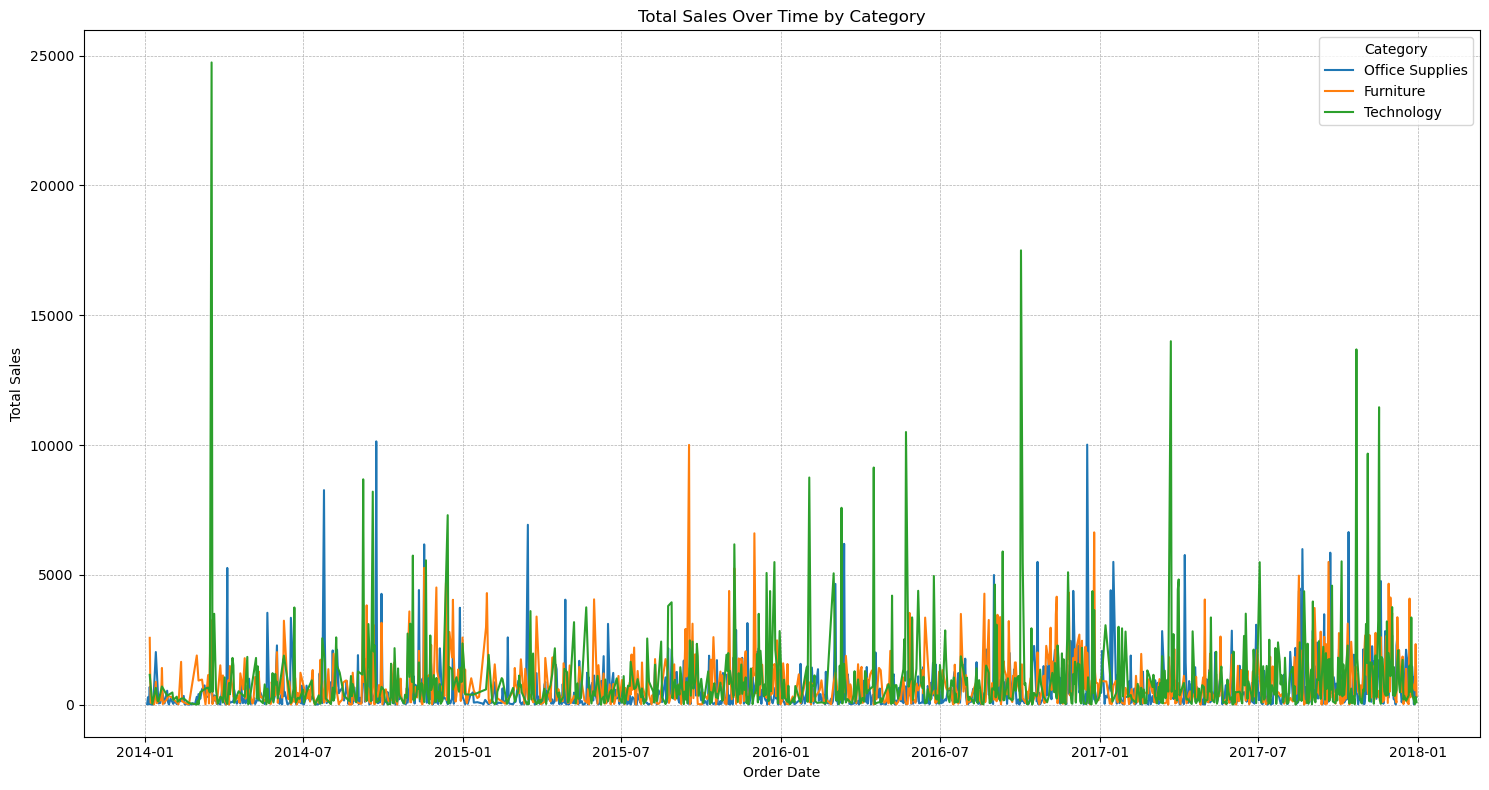

In [85]:
plt.figure(figsize=(15, 8))

plt.figure(figsize=(15, 8))

# Plot total sales over time for each category
sns.lineplot(data=aggregated_sales, x='Order Date', y='Sales', hue='Category')
plt.title('Total Sales Over Time by Category')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

## Chart Insights:

  The x-axis marks the date, and the y-axis represents daily sales values.
  
1.-  Each color corresponds to a product category: Office Supplies, Furniture, and Technology.
  
2.-  Sales for all categories exhibit periodic patterns, hinting at seasonal trends.
  
3.-  The Technology category has distinct sales spikes, suggesting major sales events during those periods.

This visualization helps assess category performance over time, valuable for inventory decisions and marketing planning.

###Evaluating Data Density for Model Selection

Before selecting a forecasting model, understanding the granularity of our data is vital. Granularity refers to how detailed the data is over time.

In [87]:
# Extract month, year, and semester from 'Order Date'
aggregated_sales['Month'] = aggregated_sales['Order Date'].dt.month
aggregated_sales['Year'] = aggregated_sales['Order Date'].dt.year
aggregated_sales['Semester'] = (aggregated_sales['Month'] - 1) // 6 + 1

# Compute the number of data points in each interval
monthly_data_points = aggregated_sales.groupby(['Year', 'Month']).size().mean()
annual_data_points = aggregated_sales.groupby('Year').size().mean()
semester_data_points = aggregated_sales.groupby(['Year', 'Semester']).size().mean()

monthly_data_points, annual_data_points, semester_data_points

(59.604166666666664, 715.25, 357.625)

#### Results:

   
   Monthly: ~59.6 data points
   
   Annually: 715.25 data points
   
   By Semester: 357.63 data points

#### Insights:

Monthly and By Semester intervals have a relatively high density, making them suitable for capturing detailed sales trends.
The Annual interval might be too broad and miss out on more granular insights, especially if there are seasonal patterns in the sales data.

By evaluating the granularity, we can choose an interval that provides a balance between computational efficiency and capturing essential sales trends.

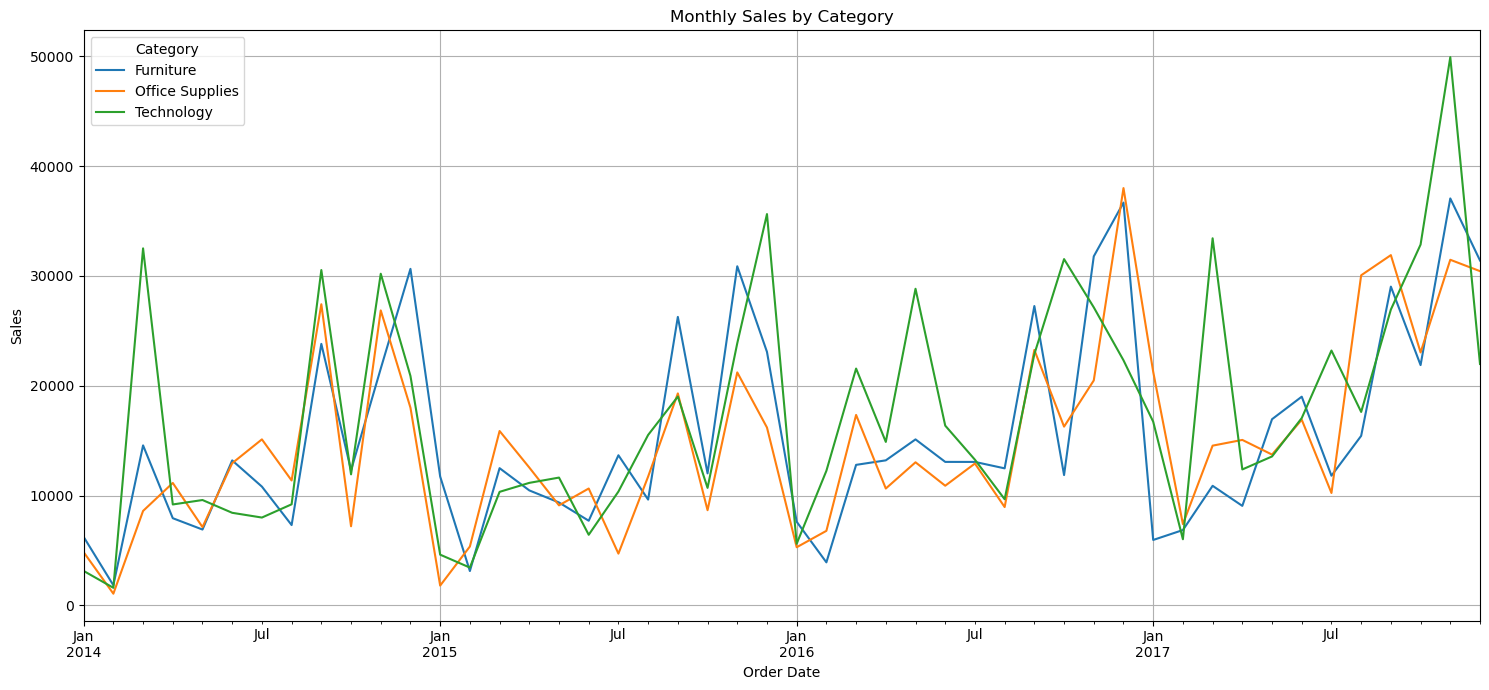

In [88]:
# Grouping the sales data by month and category
monthly_sales = superstore_df.groupby([superstore_df['Order Date'].dt.to_period("M"), 'Category'])['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

# Visualize the aggregated monthly sales
monthly_sales.pivot(index='Order Date', columns='Category', values='Sales').plot(figsize=(15, 7), grid=True)
plt.title('Monthly Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Order Date')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


Furniture: Shows a somewhat consistent pattern with slight increases over time. There are noticeable peaks, suggesting seasonality.
    
Office Supplies: This category also exhibits a steady pattern, with some noticeable peaks suggesting seasonality.


Technology: This category's sales appear to have higher volatility compared to the others. There are significant peaks, which could be due to product launches or promotional events.

Overall, there is a clear upward trend in sales across all categories, with evident seasonal patterns. This insight will be helpful when modeling the time series.

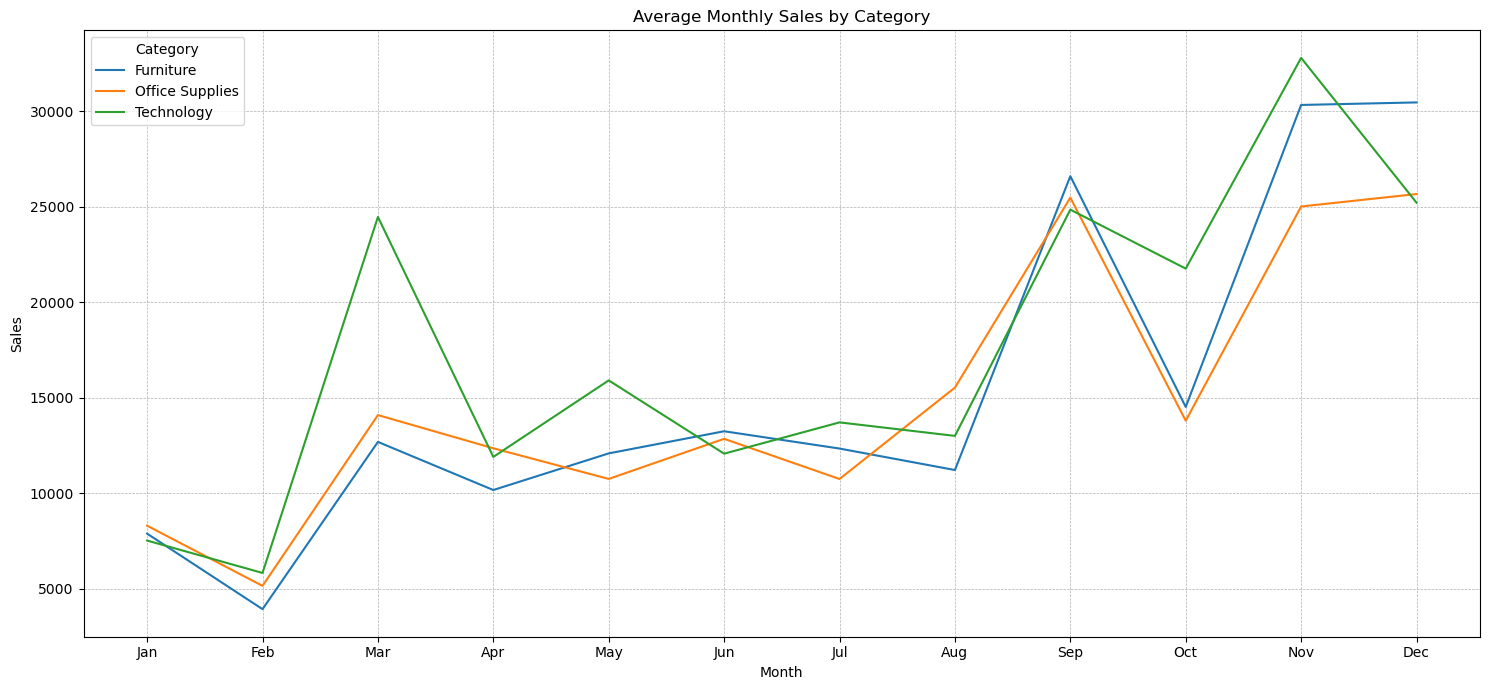

In [11]:
# Extracting the month from the Order Date to understand seasonality
monthly_sales['Month'] = monthly_sales['Order Date'].dt.month

# Calculating average sales for each month by category
avg_monthly_sales = monthly_sales.groupby(['Month', 'Category'])['Sales'].mean().reset_index()

# Pivot the data for visualization
avg_monthly_sales_pivot = avg_monthly_sales.pivot(index='Month', columns='Category', values='Sales')

# Visualize the average monthly sales
plt.figure(figsize=(15, 7))
avg_monthly_sales_pivot.plot(ax=plt.gca())
plt.title('Average Monthly Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Category')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## The chart above showcases: 


Overall Trend: Sales for all categories show seasonality with peaks and troughs over the years.

Furniture Sales: Experiences sharp spikes, particularly noticeable around mid-2016 and mid-2017.

Office Supplies: Displays consistent fluctuations but tends to have lower peaks compared to the other two categories.

Technology: Witnessed a significant upward trend, especially starting from late 2016 and continuing through 2017.

Comparison: While all categories have fluctuations, Technology often surpasses Furniture and Office Supplies in sales during peak months.

General: Most significant sales hikes seem to occur around mid-year, suggesting potential seasonal promotions or industry trends.

## From this visualization, we can infer a few points:

Sales for all categories tend to increase around the middle to the latter half of the year.
    
There's a notable boost in sales for the Technology category towards the end of the year, possibly due to holiday sales, promotions, or new product launches.
    
The Office Supplies category sees a spike in September, which might be linked to back-to-school shopping.

This seasonality understanding will be crucial for our forecasting, as capturing such patterns will help improve our model's accuracy. And It would be beneficial to cross-reference with specific events, promotions, or market changes to identify causes for these patterns.

# 4. Feature Engineering:

Re-aggregating Sales Data:

The dataset superstore_df is re-aggregated to get monthly sales for each category (Furniture, Office Supplies, and Technology). An additional column "Total Sales" is created by summing the sales across all categories for each month.

## Creation of New Features:

Lag Features: These features represent the sales of previous months. The code creates three such features (lag_1, lag_2, and lag_3) which denote the total sales from 1, 2, and 3 months ago respectively.

Rolling Window Features: The rolling_avg_3 column is the average of total sales over a rolling window of 3 months.

Date Features: Various date-based features are extracted from the index, which is 'Order Date'. These include the year, month, day, and weekday of each entry in the dataframe.

In [89]:
# Re-aggregating the data by month
monthly_sales_df = superstore_df.groupby([pd.Grouper(key='Order Date', freq='M'), 'Category'])['Sales'].sum().reset_index()
monthly_sales_df = monthly_sales_df.pivot(index='Order Date', columns='Category', values='Sales').fillna(0)
monthly_sales_df['Total Sales'] = monthly_sales_df.sum(axis=1)

# 1. Lag Features
for i in range(1, 4):
    monthly_sales_df[f'lag_{i}'] = monthly_sales_df['Total Sales'].shift(i)

# 2. Rolling Window Features
monthly_sales_df['rolling_avg_3'] = monthly_sales_df['Total Sales'].rolling(window=3).mean()

# 3. Date Features
monthly_sales_df['year'] = monthly_sales_df.index.year
monthly_sales_df['month'] = monthly_sales_df.index.month
monthly_sales_df['day'] = monthly_sales_df.index.day
monthly_sales_df['weekday'] = monthly_sales_df.index.weekday  # Monday=0, Sunday=6

monthly_sales_df.head(10)  # Display the first 10 rows to check our engineered features

Category,Furniture,Office Supplies,Technology,Total Sales,lag_1,lag_2,lag_3,rolling_avg_3,year,month,day,weekday
Order Date,,,,,,,,,,,,
2014-01-31,6242.5250,4851.080,3143.290,14236.8950,NaN,NaN,NaN,NaN,2014,1,31,4
2014-02-28,1839.6580,1071.724,1608.510,4519.8920,14236.8950,NaN,NaN,NaN,2014,2,28,4
2014-03-31,14573.9560,8605.879,32511.174,55691.0090,4519.8920,14236.8950,NaN,24815.932000,2014,3,31,0
2014-04-30,7944.8370,11155.074,9195.434,28295.3450,55691.0090,4519.8920,14236.8950,29502.082000,2014,4,30,2
2014-05-31,6912.7870,7135.624,9599.876,23648.2870,28295.3450,55691.0090,4519.8920,35878.213667,2014,5,31,5
2014-06-30,13206.1256,12953.037,8435.965,34595.1276,23648.2870,28295.3450,55691.0090,28846.253200,2014,6,30,0
2014-07-31,10821.0510,15121.208,8004.134,33946.3930,34595.1276,23648.2870,28295.3450,30729.935867,2014,7,31,3
2014-08-31,7320.3465,11379.462,9209.660,27909.4685,33946.3930,34595.1276,23648.2870,32150.329700,2014,8,31,6
2014-09-30,23816.4808,27423.298,30537.572,81777.3508,27909.4685,33946.3930,34595.1276,47877.737433,2014,9,30,1


# 5. Time Series Decomposition:

Decomposition breaks the time series into three components:

 Trend: The underlying trend in the data.

 Seasonal: Seasonal fluctuations.
    
 Residual: The noise or random fluctuations once the trend and seasonality have been accounted for.

For each category, plots are generated to visualize these four components as well as the observed time series data.

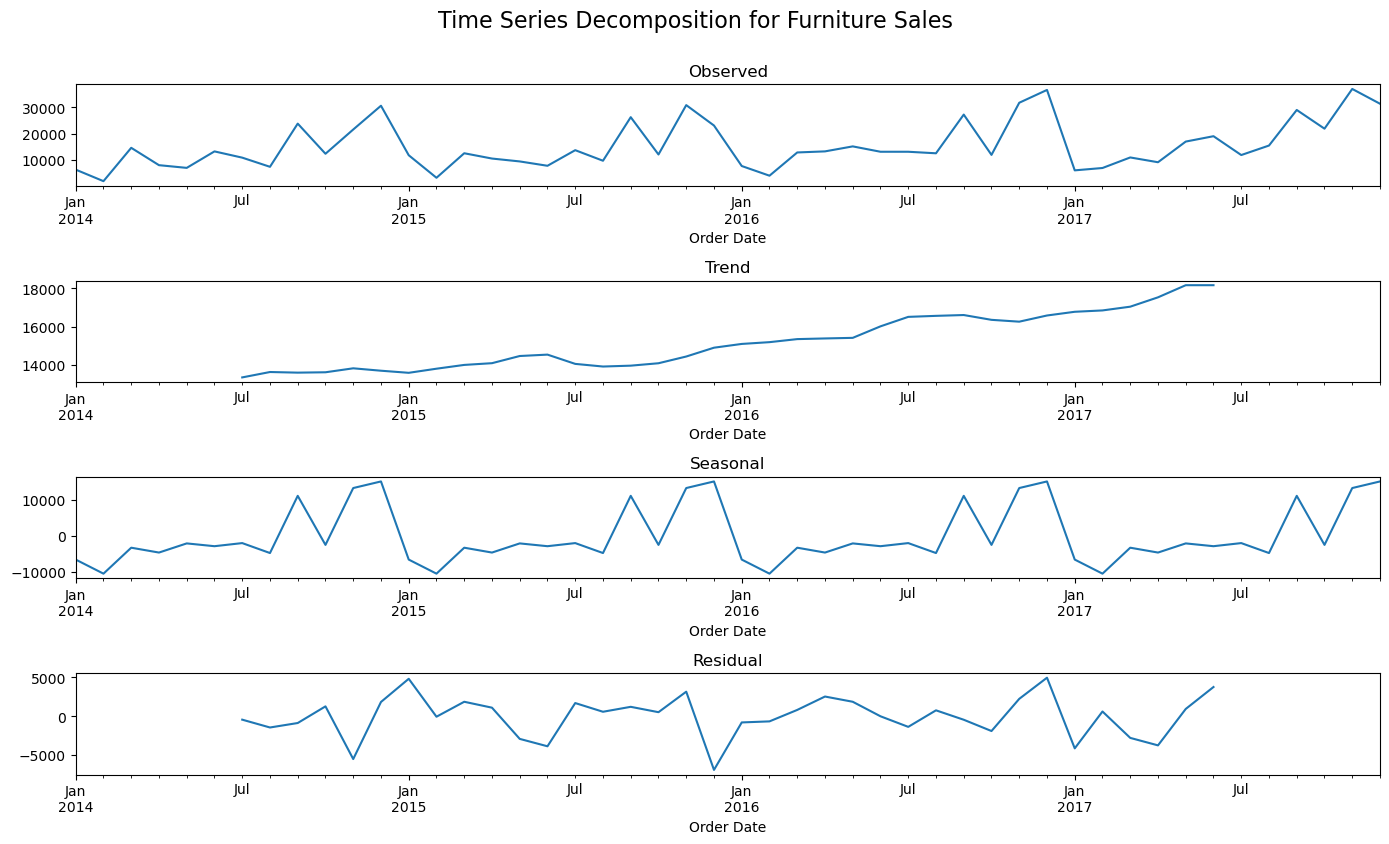

In [24]:
# Extract and decompose the time series for the 'Furniture' category using the monthly_sales_df dataframe
furniture_ts = monthly_sales_df['Furniture']
decomposition_furniture = seasonal_decompose(furniture_ts, model='additive', period=12)

# Plot the decomposed time series for 'Furniture'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 8))
decomposition_furniture.observed.plot(ax=ax1, title='Observed')
decomposition_furniture.trend.plot(ax=ax2, title='Trend')
decomposition_furniture.seasonal.plot(ax=ax3, title='Seasonal')
decomposition_furniture.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.suptitle('Time Series Decomposition for Furniture Sales', fontsize=16, y=1.05)
plt.show()

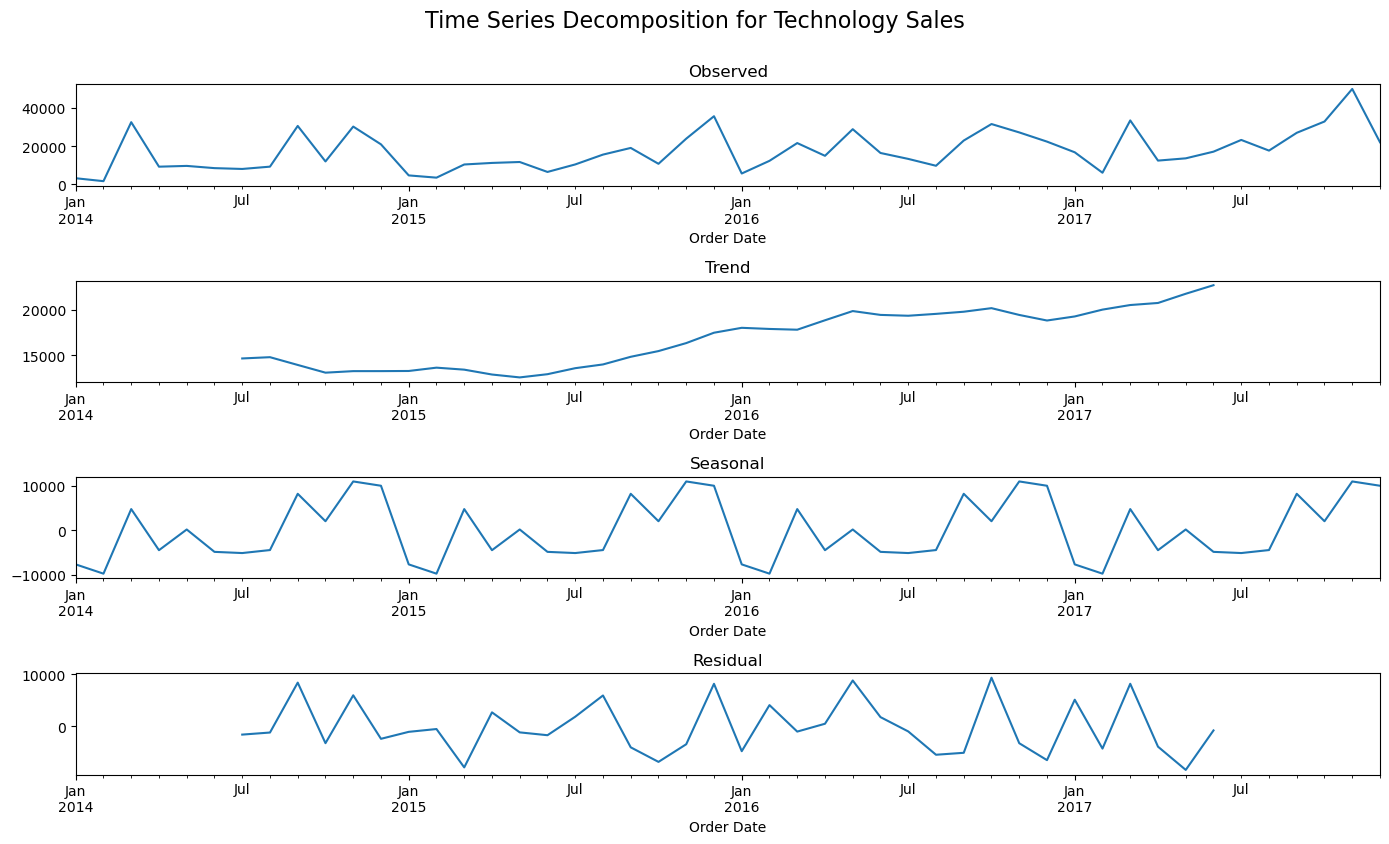

In [91]:
# Extract and decompose the time series for the 'Furniture' category using the monthly_sales_df dataframe
technology_ts = monthly_sales_df['Technology']
decomposition_technology = seasonal_decompose(technology_ts, model='additive', period=12)

# Plot the decomposed time series for 'Furniture'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 8))
decomposition_technology.observed.plot(ax=ax1, title='Observed')
decomposition_technology.trend.plot(ax=ax2, title='Trend')
decomposition_technology.seasonal.plot(ax=ax3, title='Seasonal')
decomposition_technology.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.suptitle('Time Series Decomposition for Technology Sales', fontsize=16, y=1.05)
plt.show()

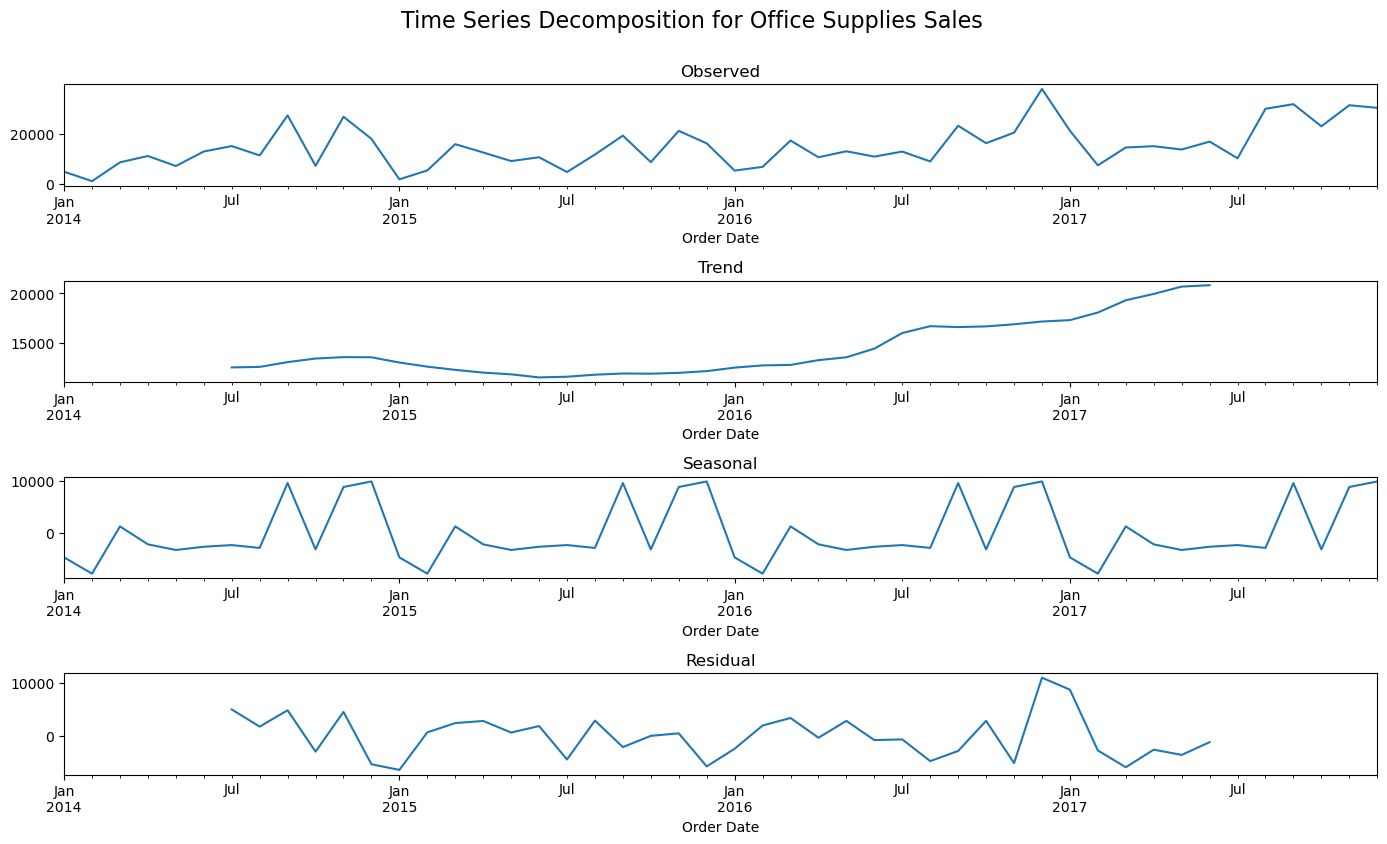

In [90]:
# Extract and decompose the time series for the 'Office Supplies' category using the monthly_sales_df dataframe
office_supplies_ts = monthly_sales_df['Office Supplies']
decomposition_office_supplies = seasonal_decompose(office_supplies_ts, model='additive', period=12)

# Plot the decomposed time series for 'Office Supplies'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 8))
decomposition_office_supplies.observed.plot(ax=ax1, title='Observed')
decomposition_office_supplies.trend.plot(ax=ax2, title='Trend')
decomposition_office_supplies.seasonal.plot(ax=ax3, title='Seasonal')
decomposition_office_supplies.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.suptitle('Time Series Decomposition for Office Supplies Sales', fontsize=16, y=1.05)
plt.show()

## Time Series Decomposition Analysis:

### 1. Furniture Sales:

   Observed: Fluctuating sales data over the given period.
    
   Trend: Gradual upward trend indicating growth.
    
   Seasonal: Periodic spikes and dips, indicating seasonal patterns.
    
   Residual: Variability not captured by trend or seasonality.
    

### 2. Office Supplies Sales:

   Observed: Varied sales data with noticeable patterns.
    
   Trend: Steady upward trend showcasing increased demand.
    
   Seasonal: Periodic fluctuations, reflecting seasonal purchase behavior.
    
   Residual: Remaining variations after accounting for trend and seasonality.
    

### 3. Technology Sales:

   Observed: Sales fluctuate periodically with noticeable highs around mid-year and at the beginning of the year.
    
   Trend: Steady upward trend from the start of 2014 to mid-2017.
    
   Seasonal: Clear seasonal patterns with peaks around mid-year and troughs near the year's end.
  
   Residual: Remaining variations indicate some unpredicted sales changes, especially notable around the end of the year.

# 6. Model Selection:

In the modeling process, feature selection plays a pivotal role. Thus, before diving deep into model training, it's prudent to revisit the statistics of potential features, discerning their distributions, and examining any outliers or patterns that may arise. In this context, I am focusing on the 'Sales' column of the dataset, which is an indispensable predictor.
Revisiting General Statistics for the 'Sales' Column:# 6. Model Selection:

I'll take another look at the dataset to identify potential features and patterns that could inform the modeling approach.

I'll start by revisiting the general statistics and distributions of key columns, especially the 'Sales' column. I'll also explore any potential cyclical patterns or other nuances within the data.

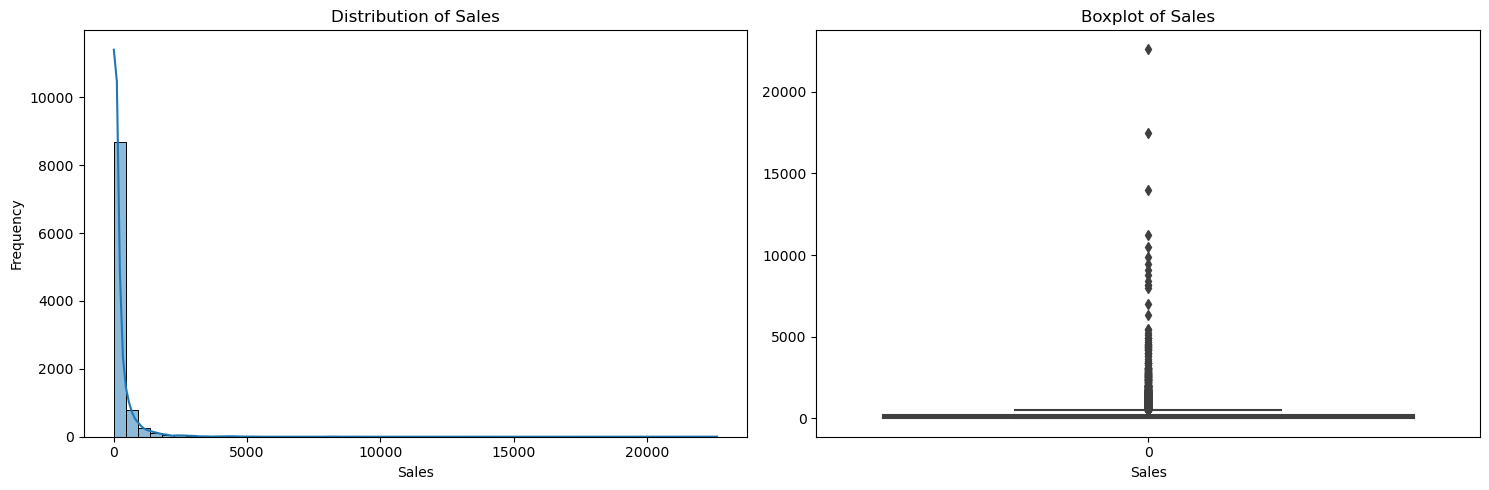

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [92]:
# Revisiting general statistics for the 'Sales' column
sales_statistics = superstore_df['Sales'].describe()

# Plotting distribution of sales
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(superstore_df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(superstore_df['Sales'])
plt.title('Boxplot of Sales')
plt.xlabel('Sales')

plt.tight_layout()
plt.show()

sales_statistics

## From the above visualizations and statistics, the following insights can be gleaned:

Distribution: The sales data portrays a conspicuous right skewness. This suggests that while there are a few high sales values, a majority of the sales values are huddled towards the lower end.

### Statistics:

 Mean: The average sales value hovers around $229.86.
        
 Median: The median sales value is pegged at $54.49, markedly lower than the mean. This divergence between the mean and median buttresses the skewness in the distribution.
        
 Outliers: The maximum sales value catapults to a whopping $22,638.48. This, in conjunction with other high-value data points discernible from the boxplot, accentuates the presence of outliers in the data.

These insights form the foundation for the modeling approach, emphasizing the need to handle skewness and outliers judiciously to prevent them from adversely impacting the predictive accuracy.e boxplot.

In [35]:
from prophet import Prophet

# Extract monthly sales for the 'Furniture' category
furniture_data_monthly = monthly_sales_df[['Furniture']].reset_index()
furniture_data_monthly.columns = ['ds', 'y']

# Define the train size (80% of the data)
train_size = int(0.8 * len(furniture_data_monthly))

# Split the data into training and testing sets
train_data = furniture_data_monthly.iloc[:train_size]
test_data = furniture_data_monthly.iloc[train_size:]

# Use Prophet for forecasting
model = Prophet()
model.fit(train_data)
future = model.make_future_dataframe(periods=len(test_data), freq='M')
forecast = model.predict(future)

# Extract the forecasted values for the test set dates
predicted_values = forecast['yhat'][train_size:].values

11:02:02 - cmdstanpy - INFO - Chain [1] start processing
11:02:02 - cmdstanpy - INFO - Chain [1] done processing


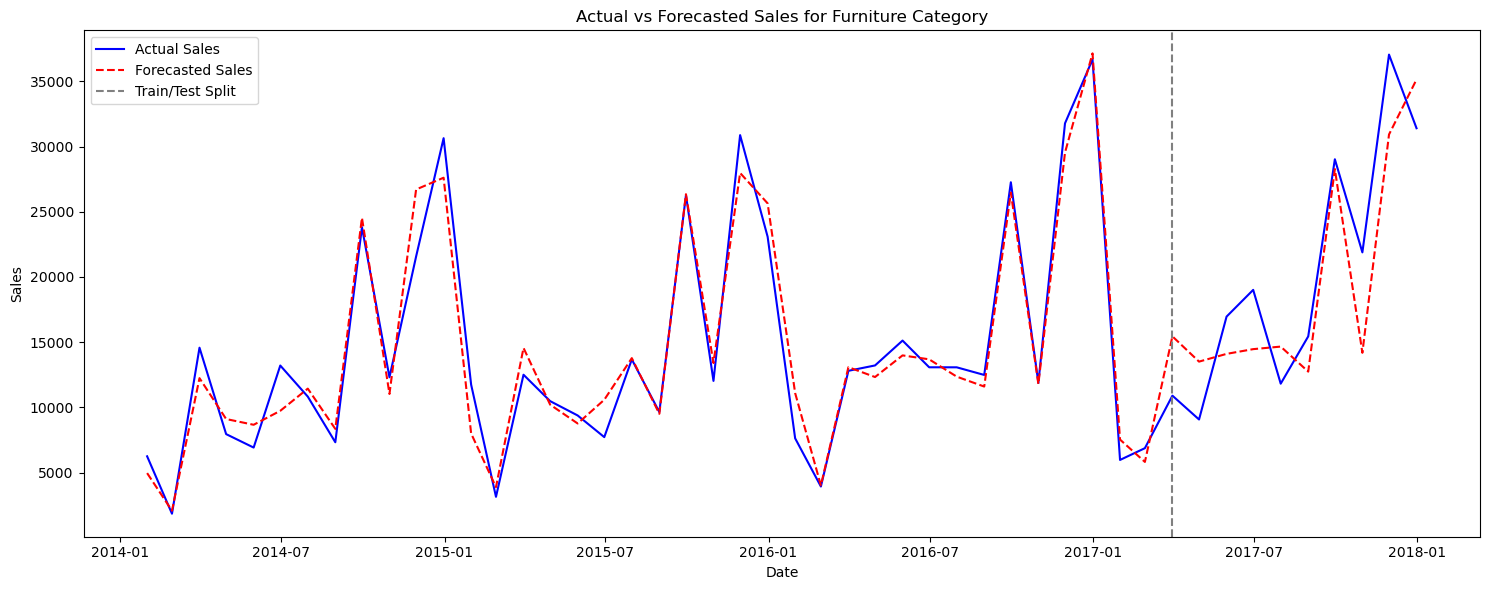

In [37]:
# Plot the actual values
plt.figure(figsize=(15, 6))
plt.plot(furniture_data_monthly['ds'], furniture_data_monthly['y'], label='Actual Sales', color='blue')

# Plot the forecasted values
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='red', linestyle='--')

# Highlight the training and testing sets for clarity
plt.axvline(furniture_data_monthly['ds'].iloc[train_size], color='gray', linestyle='--', label='Train/Test Split')

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales for Furniture Category')
plt.legend()
plt.tight_layout()
plt.show()

# From the plot, we can observe:

  Training Data: The blue line (Actual Sales) prior to the gray dashed line (Train/Test Split) represents the training data used to train the model. The red dashed line (Forecasted Sales) overlaps with this blue line, showing the model's fit to the training data.

  Testing Data: Post the gray dashed line, the blue line represents the actual sales of the testing data, while the red dashed line represents the model's forecasts.

  Model Performance: It's evident that the Prophet model captures the general trends and seasonality quite well. However, there are points where the model deviates from the actual values. This is expected as no model is perfect.

In [36]:
from sklearn.metrics import mean_squared_error 

# Calculate the RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_data['y'], predicted_values))
mape = np.mean(np.abs((test_data['y'] - predicted_values) / test_data['y'])) * 100

rmse, mape

(4428.179014292357, 23.933511261500072)

### Those results indicate the following:

#### RMSE (Root Mean Squared Error): 4428.17
        
   This means, on average, the model's predictions are approximately $4428.17 off from the actual values.

#### MAPE (Mean Absolute Percentage Error): 23.9%

The MAPE of 23.9% suggests that, on average, the model's predictions deviate by approximately 23.9% from the actual values. This metric provides a measure of the relative accuracy of the forecasts, with lower values indicating better accuracy.

#### I 'll perform the Augmented Dickey-Fuller (ADF) test to evaluate whether the 'Furniture' sales data is stationary or not. The ADF test is commonly used in time series analysis to check for stationarity in a dataset.

In [44]:
from statsmodels.tsa.stattools import adfuller

# Extract the 'Furniture' sales data
furniture_sales_data = monthly_sales_df['Furniture']

# Perform the ADF test
result = adfuller(furniture_sales_data)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.699026242828903
p-value: 8.450793985809654e-05
Critical Values:
	1%: -3.5778480370438146
	5%: -2.925338105429433
	10%: -2.6007735310095064


#### Based on the results:

  The ADF Statistic (-4.70) is more negative than the critical values at all confidence levels.
    
  The p-value (8.45e-05) is very close to zero.

These results indicate strong evidence in favor of stationarity for the 'Furniture' sales data. In other words, the 'Furniture' sales data is likely stationary, which is a desirable property for time series analysis.

# Second approach: SARIMAX model

In this section, we explore an alternative approach to time series forecasting using SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors) modeling. SARIMAX extends SARIMA by allowing the incorporation of exogenous variables, which can enhance the model's predictive capabilities. We'll employ grid search to systematically identify the best SARIMAX model parameters for our 'Furniture' sales data, considering both the seasonal component and any potential external factors. This approach provides a robust framework for capturing complex seasonal patterns and the influence of additional variables on sales.

In [75]:
import warnings
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Define the d and q parameters to take any value between 0 and 1
p = d = q = range(0, 2)

# Generate all different combinations of p, d, and q
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # assuming monthly data

# Split your dataset into train and test set here

best_aic = float("inf")
best_order = None
best_seasonal_order = None

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

print(f"Best SARIMAX{best_order}x{best_seasonal_order} - AIC:{best_aic}")


Best SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:220.7599047942939


In [93]:
# Fitting the model with the best parameters
model = SARIMAX(train, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=len(test)).predicted_mean
forecast_conf_int = results.get_forecast(steps=len(test)).conf_int()

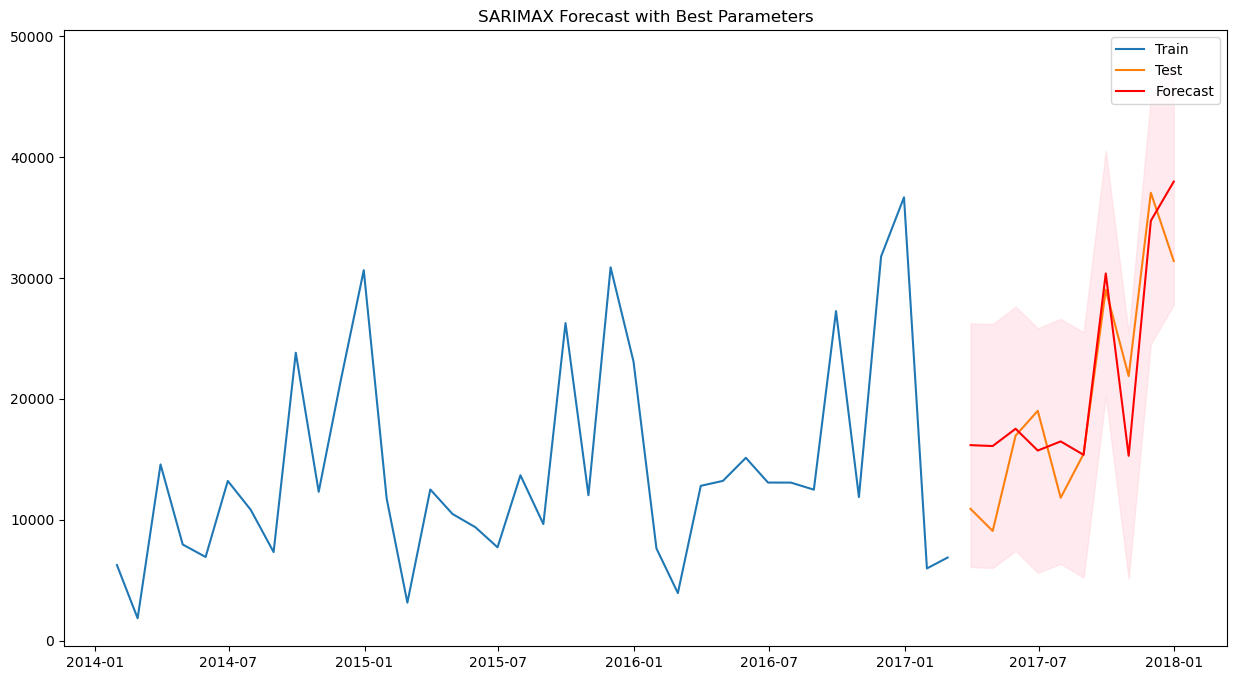

In [78]:
# Visualizing the results
plt.figure(figsize=(15, 8))
plt.plot(train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecast with Best Parameters')
plt.show()

## From the plot, we can observe:

  Clear Seasonality: Your sales data appears to have a clear seasonality, which could explain why the SARIMAX model (that accounts for seasonality) performs better than a simple ARIMA model.

  Fit to the Test Data: The forecasted values from the SARIMAX model (shown in red) seem to closely follow the test data (yellow). This is a good sign, suggesting that the model has captured the underlying patterns in the data reasonably well.

  Confidence Interval: The shaded area around the forecast represents the confidence interval. It gives an idea of the uncertainty associated with the predictions. The narrower the confidence interval, the more certain the model is about its predictions.

In [80]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse:.2f}')

RMSE: 4516.78


# Conclusion:

In my exploration of retail sales using time series analysis, I focused on the 'Furniture' category in the Superstore dataset. Here's what I found:

I used two models for forecasting: Prophet and SARIMAX.

  ### Prophet Model: It performed reasonably well with an RMSE of around 4428.17 and a MAPE of 23.9%.

  ### SARIMAX Model: This alternative approach resulted in an RMSE of 4516.78.

While both models performed reasonably well, there is room for improvement. Notably, I did not address the presence of outliers in the data, which could have influenced our model's performance. Additionally, incorporating holidays or special events, particularly for the Prophet model, could enhance its accuracy.

In summary, this analysis serves as a solid foundation for retail sales forecasting. Future work may involve refining the models, handling outliers, and considering external factors to achieve even more accurate predictions.